# Program Penelitian Model CNN untuk Klasifikasi Burung Merak Hijau

## Pra-Proses

### 1. Melakukan Frame Extraction dari Data Video

In [2]:
# BAGIAN IMPORT
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import shutil

from PIL import Image
from torchvision import transforms

import random

In [2]:
# Fungsi untuk mendapatkan nama dari file
def get_nama_file(path_nama):
    path_nama_norm = os.path.normpath(path_nama)
    new = path_nama_norm.split("\\")
    nama_file, ekstensi = new[-1].split(".")
    if not nama_file:
        print("Gagal mengambil nama file..")
        return None
    # print("Berhasil mengambil nama file : "+nama_file)
    return nama_file, ekstensi

In [7]:
# Fungsi untuk mengkonversi video ke gambar setiap detik
def ekstrasi_frame_dari_video(path_sumber_video, path_hasil_ekstrasi):
    
    # Membuka video dengan cv2
    file_video = cv2.VideoCapture(path_sumber_video)

    # Memeriksa file video dapat dibuka atau tidak
    if not file_video.isOpened():
        print("Terjadi kesalahan! Tidak dapat membuka video. Periksa kembali video yang ingin dibuka")
        return None
    
    # Ambil nama video
    nama_video, ekstensi = get_nama_file(path_sumber_video)
    
    # Memeriksa folder untuk menempatkan hasil ekstrasi sudah ada
    if not os.path.exists(path_hasil_ekstrasi):
        os.makedirs(path_hasil_ekstrasi)

    frame_rate = int(file_video.get(5)) # Mendapatkan kecepatan bingkai (frame rate) video
    hitung_bingkai = 0

    while True:
        ret, bingkai = file_video.read()
        
        if not ret:
            break

        if hitung_bingkai % frame_rate == 0:
            # Simpan frame sebagai gambar bertipe jpg
            nama_bingkai = f"{path_hasil_ekstrasi}\{nama_video}_{hitung_bingkai // frame_rate}.jpg"
            cv2.imwrite(nama_bingkai, bingkai)
        
        hitung_bingkai += 1
    
    file_video.release()
    cv2.destroyAllWindows()

In [50]:
# # Fungsi ke-2 untuk mengkonversi video ke gambar dari setiap frame
# def ekstrasi_frame_dari_video2(path_sumber_video, path_hasil_ekstrasi):

#     # Membuka video dengan cv2
#     file_video = cv2.VideoCapture(path_sumber_video)

#     # Memeriksa file video dapat dibuka atau tidak
#     if not file_video.isOpened():
#         print("Terjadi kesalahan! Tidak dapat membuka video. Periksa kembali video yang ingin dibuka")
#         return None
    
#     # Ambil nama video
#     nama_video, ekstensi = get_nama_file(path_sumber_video)

#     # Memeriksa folder untuk menempatkan hasil ekstrasi sudah ada
#     if not os.path.exists(path_hasil_ekstrasi):
#         os.makedirs(path_hasil_ekstrasi)

#     hitung_bingkai = 0
#     while True:
#         success, image = file_video.read()

#         if not success:
#             break

#         nama_bingkai = f"{path_hasil_ekstrasi}\{nama_video}_{hitung_bingkai}.jpg"
#         cv2.imwrite(nama_bingkai, image)

#         hitung_bingkai+=1
        
#     file_video.release()
#     cv2.destroyAllWindows()
    

In [51]:
#coba coba aja

path_src = "D:\My Python Program\Coba Coba"
path_output = "D:\My Python Program\Coba Coba\hasil"

for nama_video in os.listdir(path_src):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_src, nama_video)
        ekstrasi_frame_dari_video2(lokasi_video_sumber, path_output)

Berhasil mengambil nama file : VID_20240202_105239


In [8]:
# Bagian Eksekusi frame extraction

# Merak Hijau
path_video_merakhijau = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Merak Hijau"
path_hasil_ekstrasi_merakhijau = ".\hasil ekstrasi frame video\Merak Hijau"

# Kaua Raja
path_video_kauaraja = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Kaua Raja"
path_hasil_ekstrasi_kauaraja = ".\hasil ekstrasi frame video\Kaua Raja"

## Sempidan Biru
path_video_sempidanbiru = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Sempidan Biru"
path_hasil_ekstrasi_sempidanbiru = ".\hasil ekstrasi frame video\Sempidan Biru"

print("============ Memulai Proses Ekstrasi Video Merak Hijau =========== ")
for nama_video in os.listdir(path_video_merakhijau):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_merakhijau, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_merakhijau)
print("============ Selesai Ekstrasi Video Merak Hijau =========== ")

print("============ Memulai Proses Ekstrasi Video Kaua Raja =========== ")
for nama_video in os.listdir(path_video_kauaraja):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_kauaraja, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_kauaraja)
print("============ Selesai Ekstrasi Video Kaua Raja =========== ")

print("============ Memulai Proses Ekstrasi Video Sempidan Biru =========== ")
for nama_video in os.listdir(path_video_sempidanbiru):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_sempidanbiru, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_sempidanbiru)
print("============ Selesai Ekstrasi Video Sempidan Biru =========== ")

# cek path
# print(os.path.exists(path_video))
# print(os.path.exists(path_hasil_ekstrasi))

============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131416
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131641
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131733
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131814
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131856
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil m

### 2. Seleksi data citra primer (Dilakukan Manual)

### 3. Penggabungan Data Primer & Sekunder

In [3]:
# DATA SEKUNDER

# Path Merak
merak_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Merak Hijau"
merak_dst_path = ".\join primer sekunder\Merak Hijau"

# Path Kaua Raja
kaua_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Kaua Raja"
kaua_dst_path = ".\join primer sekunder\Kaua Raja"

# Path Sempidan Biru
sempidan_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Sempidan Biru"
sempidan_dst_path = ".\join primer sekunder\Sempidan Biru"

# Merak
print("Memulai proses memulai pemindahan data sekunder burung merak..")
counter = 0
for nama_file in os.listdir(merak_src_path_s):
    counter+=1
    loc_file = os.path.join(merak_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(merak_dst_path,name_new_file)
    if not os.path.exists(merak_dst_path):
        os.makedirs(merak_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung merak selesai !\n")

# Kaua
print("Memulai proses memulai pemindahan data sekunder burung kaua..")
counter = 0
for nama_file in os.listdir(kaua_src_path_s):
    counter+=1
    loc_file = os.path.join(kaua_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(kaua_dst_path,name_new_file)
    if not os.path.exists(kaua_dst_path):
        os.makedirs(kaua_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung kaua selesai !\n")

# Sempidan
print("Memulai proses memulai pemindahan data sekunder burung sempidan..")
counter = 0
for nama_file in os.listdir(sempidan_src_path_s):
    counter+=1
    loc_file = os.path.join(sempidan_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(sempidan_dst_path,name_new_file)
    if not os.path.exists(sempidan_dst_path):
        os.makedirs(sempidan_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung sempidan selesai !\n")

Memulai proses memulai pemindahan data sekunder burung merak..
Pemindahan data burung merak selesai !

Memulai proses memulai pemindahan data sekunder burung kaua..
Pemindahan data burung kaua selesai !

Memulai proses memulai pemindahan data sekunder burung sempidan..
Pemindahan data burung sempidan selesai !



In [33]:
# DATA PRIMER

# Path Merak
merak_src_path_p = ".\seleksi gambar dari ekstrasi frame\Merak Hijau"
merak_dst_path = ".\join primer sekunder\Merak Hijau"

# Path Kaua Raja
kaua_src_path_p = ".\seleksi gambar dari ekstrasi frame\Kaua Raja"
kaua_dst_path = ".\join primer sekunder\Kaua Raja"

# Path Sempidan Biru
sempidan_src_path_p = ".\seleksi gambar dari ekstrasi frame\Sempidan Biru"
sempidan_dst_path = ".\join primer sekunder\Sempidan Biru"

# Merak
print("Memulai proses memulai pemindahan data primer burung merak..")
counter = 0
for nama_file in os.listdir(merak_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(merak_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(merak_dst_path,name_new_file)
        if not os.path.exists(merak_dst_path):
            os.makedirs(merak_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung merak selesai !")
print(f"Total data burung : {len(os.listdir(merak_dst_path))}\n")

# Kaua
print("Memulai proses memulai pemindahan data primer burung kaua..")
counter = 0
for nama_file in os.listdir(kaua_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(kaua_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(kaua_dst_path,name_new_file)
        if not os.path.exists(kaua_dst_path):
            os.makedirs(kaua_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung kaua selesai !")
print(f"Total data burung : {len(os.listdir(kaua_dst_path))}\n")

# Sempidan
print("Memulai proses memulai pemindahan data primer burung sempidan..")
counter = 0
for nama_file in os.listdir(sempidan_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(sempidan_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(sempidan_dst_path,name_new_file)
        if not os.path.exists(sempidan_dst_path):
            os.makedirs(sempidan_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung sempidan selesai !")
print(f"Total data burung : {len(os.listdir(sempidan_dst_path))}\n")

Memulai proses memulai pemindahan data primer burung merak..
Pemindahan data burung merak selesai !
Total data burung : 383

Memulai proses memulai pemindahan data primer burung kaua..
Pemindahan data burung kaua selesai !
Total data burung : 383

Memulai proses memulai pemindahan data primer burung sempidan..
Pemindahan data burung sempidan selesai !
Total data burung : 383



### 4. Proses denoising

In [48]:
# Fungsi untuk melakukan penghilangan derau dengan Median Filtering
def proses_denoise_median_filter(src_path, dst_path):
    
    # Load Image
    img = cv2.imread(src_path, 1)
    
    # menggunakan kernel 3x3 agar tidak terlalu blur hasilnya
    img_denoised = cv2.medianBlur(img, 3)

    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    name_img, ekstensi = get_nama_file(src_path)
    new_name_img = f"{name_img}-denoised.{ekstensi}"
    dst_full = os.path.join(dst_path, new_name_img)

    cv2.imwrite(dst_full, img_denoised)


In [50]:
# Main proses denoising
direktori_input_denoise = '.\join primer sekunder'
direktori_output = '.\denoised_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan denoise citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_merak)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan denoise citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_kaua)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan denoise citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan denoise citra burung merak, mohon tunggu..
Berhasil melakukan denoise 383 citra burung merak.
Melakukan denoise citra burung kaua, mohon tunggu..
Berhasil melakukan denoise 383 citra burung kaua.
Melakukan denoise citra burung sempidan, mohon tunggu..
Berhasil melakukan denoise 383 citra burung sempidan.


### 5. Proses Sharpening Image

In [52]:
def proses_penajaman_citra(src_path, dst_path):
    # Buat Kernel
    kernel = np.array([[0,-1,0], [-1, 5, -1], [0, -1, 0]])

    # Load Image
    img = cv2.imread(src_path, 1)
    
    # menggunakan kernel 3x3 dengan nilai tertentu
    img_sharpened = cv2.filter2D(img,-1, kernel)

    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    name_img, ekstensi = get_nama_file(src_path)
    new_name_img = f"{name_img}-sharpened.{ekstensi}"
    dst_full = os.path.join(dst_path, new_name_img)

    cv2.imwrite(dst_full, img_sharpened)

In [55]:
# Main proses sharpening
direktori_input_denoise = '.\denoised_image'
direktori_output = '.\sharpened_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan penjamanan citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_penajaman_citra(gambar,output_denoise_merak)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan penjamanan citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_penajaman_citra(gambar,output_denoise_kaua)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan penjamanan citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_penajaman_citra(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan penjamanan citra burung merak, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung merak.
Melakukan penjamanan citra burung kaua, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung kaua.
Melakukan penjamanan citra burung sempidan, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung sempidan.


### 6. Proses Contrast Stretching

In [5]:
# Fungsi untuk menampilkan histogram dari sebuah gambar
def show_histogram_img(data_img):

    img_b = data_img[:,:,0]
    img_g = data_img[:,:,1]
    img_r = data_img[:,:,2]

    # fig, ax = plt.subplots(3, 1)
    # fig.tight_layout(h_pad=2)
    # ax[0].hist(histB.flatten(), 256, [0,256], color ='b')
    # ax[0].title.set_text("Histogram Channel Blue")
    # ax[1].hist(histG.flatten(), 256, [0,256], color ='g')
    # ax[1].title.set_text("Histogram Channel Green")
    # ax[2].hist(histR.flatten(), 256, [0,256], color ='r')
    # ax[2].title.set_text("Histogram Channel Red")
    # # plt.title("Image Histogram")
    hist_b = cv2.calcHist(img_b, [0], None, [256], [0, 256])
    hist_g = cv2.calcHist(img_g, [0], None, [256], [0, 256])
    hist_r = cv2.calcHist(img_r, [0], None, [256], [0, 256])

    plt.subplot(231)
    plt.imshow(255-img_b, cmap='Blues') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Blue")

    plt.subplot(232)
    plt.imshow(255-img_g, cmap='Greens') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Green")

    plt.subplot(233)
    plt.imshow(255-img_r, cmap='Reds') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Red")

    plt.subplot(234)
    plt.bar(range(256), hist_b.flatten(), color='b')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Blue")

    plt.subplot(235)
    plt.bar(range(256), hist_g.flatten(), color='g')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Green")

    plt.subplot(236)
    plt.bar(range(256), hist_r.flatten(), color='r')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Red")

    plt.tight_layout()
    plt.show()

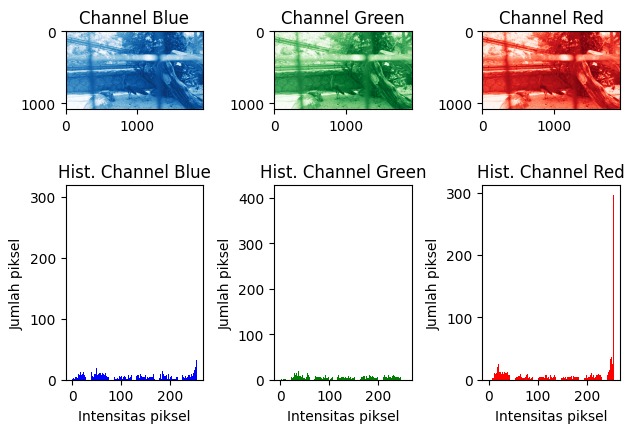

In [20]:
gmbr = cv2.imread("VID_20240202_105421_19.jpg", 1)
show_histogram_img(gmbr)

In [26]:
# Fungsi-1 untuk Contras Stretching untuk image berwarna
def proses_contrast_stretching(img):

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #membuat img menjadi array berdimensi 1 
    hist,bins = np.histogram(grey.flatten(),256,[0,256]) 
    #nilai setiap hist diakumulasikan 
    cdf = hist.cumsum() 
    #membuat masking img  
    cdf_m = np.ma.masked_equal(cdf,0) 
    #melakukan kontras stretching pada citra
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #merubah cdf menjadi variable image "bertipe uint8" 
    cdf = np.ma.filled(cdf_m,0).astype('uint8') 
    #hasil citra setelah contras stretching
    img2 = cdf[img]

    return img2

In [25]:
# Fungsi-2 untuk Contras Stretching untuk image berwarna
def proses_contrast_stretching2(img, dst_path):
    # load gambar
    img_ini = cv2.imread(img,1)

    img_b, img_g, img_r = cv2.split(img_ini)

    # parameter
    a = 0           # nilai min
    b = 255         # nilai max
    c_blue = np.min(img_b)
    d_blue = np.max(img_b)
    c_green = np.min(img_g)
    d_green = np.max(img_g)
    c_red = np.min(img_r)
    d_red = np.max(img_r)

    # ukuran img
    row, col, chnl = img_ini.shape
    # dummy citra
    new_img_b = np.zeros([row,col], dtype="uint8")
    new_img_g= np.zeros([row,col], dtype="uint8")
    new_img_r= np.zeros([row,col], dtype="uint8")

    # ============== Proses channel blue, green, red
    # rumus
    for i in range(row):
        for j in range(col):
            new_img_b[i,j] = ((img_b[i,j] - c_blue) * (b - a) / (d_blue - c_blue)) + a
            new_img_g[i,j] = ((img_g[i,j] - c_green) * (b - a) / (d_green - c_green)) + a
            new_img_r[i,j] = ((img_r[i,j] - c_red) * (b - a) / (d_red - c_red)) + a

    result_blue = new_img_b.astype("uint8")
    result_green = new_img_g.astype("uint8")
    result_red = new_img_r.astype("uint8")
            
    result_img = cv2.merge([result_blue, result_green, result_red])
    
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
    
    nama_gambar, ekstensi = get_nama_file(img)
    nama_gambar_baru = f"{nama_gambar}_constretch.{ekstensi}"
    dst_full = os.path.join(dst_path, nama_gambar_baru)
    
    cv2.imwrite(dst_full,result_img)
    print(f"Menyimpan Gambar berhasil {nama_gambar_baru}..")

In [26]:
# Nyoba aja 
proses_contrast_stretching2(".\\Bhn_coba_constretch.jpg", ".\\")

Menyimpan Gambar berhasil Bhn_coba_constretch_constretch.jpg..


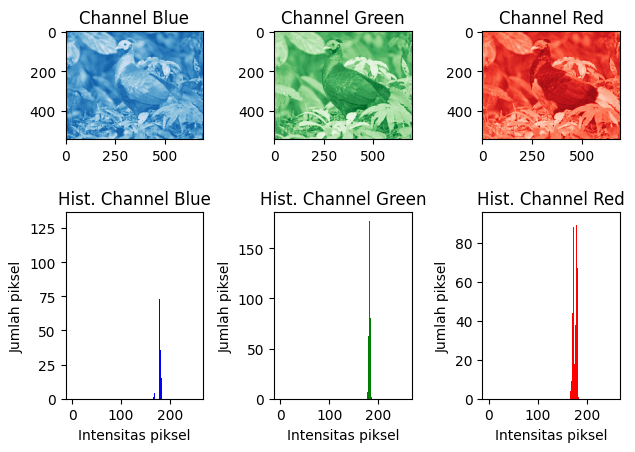

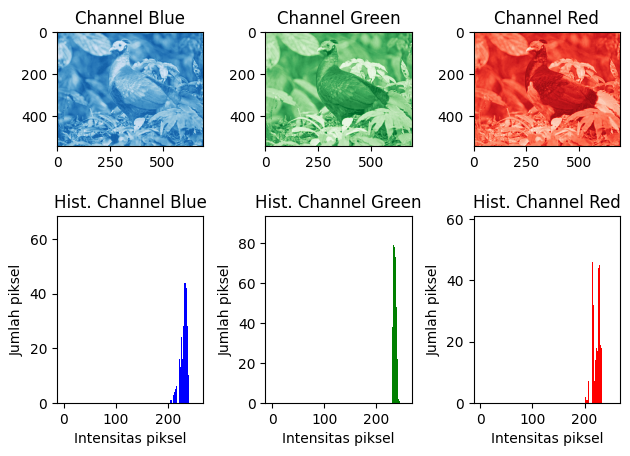

In [7]:
ini = cv2.imread("Bhn_coba.jpg", 1)
ini2 = cv2.imread("Bhn_coba_constretch.jpg", 1)
show_histogram_img(ini)
show_histogram_img(ini2)

In [15]:
# Fungsi untuk melakukan histogram equalization
def proses_ekualisasi_histogram(img):
    # Memisahkan channel citra
    b,g,r = cv2.split(img)
    
    # Histogram Citra Awal
    hist_b = cv2.calcHist(b, [0], None, [256], [0, 256])
    hist_g = cv2.calcHist(g, [0], None, [256], [0, 256])
    hist_r = cv2.calcHist(r, [0], None, [256], [0, 256])

    # Mendapatkan Frekuensi kumulatif
    cdf_b = hist_b.cumsum()
    cdf_g = hist_g.cumsum()
    cdf_r = hist_r.cumsum()

    # Rumus dan proses equalisasi
    new_pixel_b = cdf_b * (len(hist_b)-1)/cdf_b.max()
    new_pixel_g = cdf_g * (len(hist_g)-1)/cdf_g.max()
    new_pixel_r = cdf_r * (len(hist_r)-1)/cdf_r.max()
    
    new_pixel_b = np.around(new_pixel_b)
    new_pixel_b = np.uint8(new_pixel_b)
    new_pixel_g = np.around(new_pixel_g)
    new_pixel_g = np.uint8(new_pixel_g)
    new_pixel_r = np.around(new_pixel_r)
    new_pixel_r = np.uint8(new_pixel_r)
    
    equ_blue = cv2.LUT(b, new_pixel_b)
    equ_green = cv2.LUT(g, new_pixel_g)
    equ_red = cv2.LUT(r, new_pixel_r)


    equ_bgr = cv2.merge([equ_blue, equ_green, equ_red])
    return equ_bgr

In [16]:
# Main proses contrast stretching
direktori_input_denoise = '.\sharpened_image'
direktori_output = '.\contrasted_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan penarikan kontras citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_contrast_stretching2(gambar, output_denoise_merak)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan penarikan kontras citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_contrast_stretching2(gambar,output_denoise_kaua)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan penarikan kontras citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_contrast_stretching2(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan penarikan kontras citra burung merak, mohon tunggu..
Menyimpan Gambar berhasil P_1-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_10-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_100-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_101-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_102-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_103-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_104-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_105-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_106-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_107-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_108-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_109-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_11-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_110-denoised-sharpened_constr

### 7. Proses Croping (Manual)

### 8. Proses Resize Image (224x224)

In [19]:
# Fungsi proses resize gambar menjadi 224x224
def proses_resize_img(path_citra, ukuran, path_output):
    
    try:
        citra = cv2.imread(path_citra, 1)

        hasil_resize = cv2.resize(citra, ukuran, interpolation=cv2.INTER_AREA)

        if not os.path.exists(path_output):
            os.makedirs(path_output)

        nama_gambar, ekstensi = get_nama_file(path_citra)
        nama_gambar_baru = f"{nama_gambar}_resize.{ekstensi}"
        dst_full = os.path.join(path_output, nama_gambar_baru)

        cv2.imwrite(dst_full, hasil_resize)
    except:
        print("Gagal melakukan resize, periksa kembali citra, ukuran, dan direktori")

In [20]:
# Main proses resize image
direktori_input_denoise = '.\crop image'
direktori_output = '.\\resize_image\\'
ukuran_resize = (224, 224)

jenis_burung = ["Merak Hijau", "Kaua Raja", "Sempidan Biru"]

for burung in jenis_burung:
    input_resize = os.path.join(direktori_input_denoise, burung)
    output_resize = os.path.join(direktori_output, burung)
    print(f"Melakukan resize citra burung {burung}, mohon tunggu..")
    for nama_img in os.listdir(input_resize):
        gambar = os.path.join(input_resize,nama_img)
        proses_resize_img(gambar, ukuran_resize, output_resize)
    print(f"Berhasil melakukan resize {len(os.listdir(output_resize))} citra burung {burung}.")

Melakukan resize citra burung Merak Hijau, mohon tunggu..
Berhasil melakukan resize 383 citra burung Merak Hijau.
Melakukan resize citra burung Kaua Raja, mohon tunggu..
Berhasil melakukan resize 383 citra burung Kaua Raja.
Melakukan resize citra burung Sempidan Biru, mohon tunggu..
Berhasil melakukan resize 383 citra burung Sempidan Biru.


### 9. Melakukan Augmentasi Data

In [21]:
# Fungsi Augmentasi 
# Kita akan menggunakan library torchvision.transform dan PIL.Image
def proses_augmentasi(path_img, dst_path):
    try:
        img_awal = Image.open(path_img)

        # Lakukan flip, parameter 1 untuk memberikan sebuah propbabilitas pasti diflip. 
        h_flip = transforms.RandomHorizontalFlip(1)
        h_flip_img = h_flip(img_awal)

        # Lakukan random rotasi 0 - 15 derajat dari pusatnya (0,0)
        do_rotate = transforms.RandomRotation(15)
        rotate_img = do_rotate(h_flip_img)
        
        # Lakukan pengecekan path destinasi
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)

        # Penamaan citra baru
        name_img, ekstensi = get_nama_file(path_img)
        name_img = name_img.replace("crop_resize", "")
        new_name_img = f"{name_img}-aug.{ekstensi}"
        dst_full = os.path.join(dst_path, new_name_img)

        # Save image
        rotate_img.save(dst_full)
    
    except:
        print("Proses augmentasi gagal, mohon periksa kembali fungsi program proses_augmentasi.. ")

In [22]:
# Main proses augmentasi
direktori_input = '.\\resize_image\\'
direktori_output = '.\\augmentasi_image\\'

jenis_burung = ["Merak Hijau", "Kaua Raja", "Sempidan Biru"]

for burung in jenis_burung:
    input_aug = os.path.join(direktori_input, burung)
    output_aug = os.path.join(direktori_output, burung)
    print(f"Melakukan augmentasi citra burung {burung}, mohon tunggu..")
    for nama_img in os.listdir(input_aug):
        gambar = os.path.join(input_aug,nama_img)
        proses_augmentasi(gambar, output_aug)
    print(f"Berhasil melakukan augmentasi {len(os.listdir(output_aug))} citra burung {burung}.")

Melakukan augmentasi citra burung Merak Hijau, mohon tunggu..
Berhasil melakukan augmentasi 383 citra burung Merak Hijau.
Melakukan augmentasi citra burung Kaua Raja, mohon tunggu..
Berhasil melakukan augmentasi 383 citra burung Kaua Raja.
Melakukan augmentasi citra burung Sempidan Biru, mohon tunggu..
Berhasil melakukan augmentasi 383 citra burung Sempidan Biru.


### 10. Menggabungkan Data ke folder clean_data

In [23]:
# Mengabil gambar dan menggabungkannya lalu direname
gambar_asal = ["D:\\Recovery USB\\My Lectures\\Semester 10\\Skripsi Code Program\\resize_image", "D:\\Recovery USB\\My Lectures\\Semester 10\\Skripsi Code Program\\augmentasi_image"]
path_join_citra_resize_aug = ".\\clean_data"

try:
    counter = 0
    print("Memulai proses copy dan penggabungan data citra..")
    for dir_input in gambar_asal:
        jenis_burung = os.listdir(dir_input)
        for burung in jenis_burung:
            path_burung = os.path.join(dir_input, burung)
            path_folder_tujuan = os.path.join(path_join_citra_resize_aug, burung)
            # Lakukan pengecekan path destinasi
            if not os.path.exists(path_folder_tujuan):
                os.makedirs(path_folder_tujuan)
            for nama_citra in os.listdir(path_burung):
                counter += 1
                path_citra = os.path.join(path_burung, nama_citra)
                path_citra_tujuan = os.path.join(path_folder_tujuan, nama_citra)
                shutil.copy(path_citra, path_citra_tujuan)
    print("Proses copy dan penggabungan data selesai..")
    print(f"Total data yang berhasil digabungkan : {counter} citra")
except:
    print("Gagal melakukan copy dan penggabungan data!")
# print(counter)

Memulai proses copy dan penggabungan data citra..
Proses copy dan penggabungan data selesai..
Total data yang berhasil digabungkan : 2298 citra


# Pemisahan Data Training dan Testing

In [27]:
# Fungsi proses spliting dengan cara mengambil secara random
def proses_spliting(path_img, dst_path, p_train, p_test):
    # Lakukan pengecekan path destinasi untuk di delete kalau ada. (agar setiap dijalankan memberikan hasil yang berbeda)
    if os.path.exists(dst_path):
        shutil.rmtree(dst_path)
    
    folder_train = os.path.join(dst_path, "train")
    folder_test = os.path.join(dst_path, "test")
    
    os.makedirs(folder_train)
    os.makedirs(folder_test)

    jenis_burung = os.listdir(path_img)

    for burung in jenis_burung:
        path_burung = os.path.join(path_img, burung)
        list_gambar = os.listdir(path_burung)
        total_gambar = len(list_gambar)
        num_train_selected = round( total_gambar * 0.8)
        num_test_selected = total_gambar - num_train_selected
        
        if not os.path.exists(os.path.join(folder_train, burung)):
                os.makedirs(os.path.join(folder_train, burung))
        if not os.path.exists(os.path.join(folder_test, burung)):
                os.makedirs(os.path.join(folder_test, burung))

        hitung = 0
        while(len(list_gambar) != num_test_selected):
            selected_item = random.choice(list_gambar)
            list_gambar.remove(selected_item)

            hitung +=1
            loc_asal = os.path.join(path_burung, selected_item)
            nama_baru = str(hitung)+".jpg"
            loc_copy = os.path.join(folder_train, burung, nama_baru)

            shutil.copy(loc_asal, loc_copy)
        
        hitung = 0
        for i in list_gambar:
            hitung +=1
            loc_asal = os.path.join(path_burung, i)
            nama_baru = str(hitung)+".jpg"
            loc_copy = os.path.join(folder_test, burung, nama_baru)
            shutil.copy(loc_asal, loc_copy)

In [29]:
# Komposisi pemisahan data berdasarkan penelitian sebelumnya banyak yang menggunakan proporsi 80% training dan 20% testing.
path_src = ".\\clean_data"
split_data = ".\\split_data"

persen_of_train = 0.8
persen_of_test = 0.2

proses_spliting(path_src, split_data, persen_of_train, persen_of_test)

# Pembuatan Model

## Cara 1

In [1]:
# import module untuk kebutuhan model
from sklearn.datasets import load_files

import tensorflow as tf
from tensorflow import keras

import matplotlib.cm as cm

from tensorflow.keras.utils import img_to_array

from keras.utils import to_categorical
from keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam, Optimizer
from keras import applications
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.preprocessing import image

from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold, train_test_split

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from keras.models import load_model

In [2]:
import numpy as np

data_train_dir = ".\\split_data\\train"
data_test_dir = ".\\split_data\\test"

data_train = load_files(data_train_dir)
x_training = np.array(data_train['filenames'])
y_training = np.array(data_train['target'])

data_test = load_files(data_test_dir)
x_testing = np.array(data_test['filenames'])
y_testing = np.array(data_test['target'])

# Penampilan dari array
print("Contoh data Files - ", x_training)
print("Target Labels - ", y_training)
print()

print("DATA TRAIN")
print("Number of files : ", x_training.shape[0])
print("Number of targets : ", y_training.shape[0])
print()

print("DATA TEST")
print("Number of files : ", x_testing.shape[0])
print("Number of targets : ", y_testing.shape[0])
print()


print("[INFO LABELS]")
print("Kaua Raja = 0")
print("Merak Hijau = 1")
print("Sempidan Biru = 2")

Contoh data Files -  ['.\\split_data\\train\\Merak Hijau\\207.jpg'
 '.\\split_data\\train\\Kaua Raja\\147.jpg'
 '.\\split_data\\train\\Sempidan Biru\\581.jpg' ...
 '.\\split_data\\train\\Sempidan Biru\\484.jpg'
 '.\\split_data\\train\\Kaua Raja\\602.jpg'
 '.\\split_data\\train\\Merak Hijau\\163.jpg']
Target Labels -  [1 0 2 ... 2 0 1]

DATA TRAIN
Number of files :  1839
Number of targets :  1839

DATA TEST
Number of files :  459
Number of targets :  459

[INFO LABELS]
Kaua Raja = 0
Merak Hijau = 1
Sempidan Biru = 2


In [3]:
def konversi_citra_menjadi_array(list_of_filepath):
    arr_img = []
    for filepath in list_of_filepath:
        img = load_img(filepath)
        img = img_to_array(img)
        arr_img.append(img)
    return arr_img

x_training = np.array(konversi_citra_menjadi_array(x_training))
x_testing = np.array(konversi_citra_menjadi_array(x_testing))
print(x_training.shape)
print(x_testing.shape)
# print('Data citra pertama yg akan ditraining : ', x_training[0])
# print('Data citra pertama yg akan ditest : ', x_testing[0])

(1839, 224, 224, 3)
(459, 224, 224, 3)


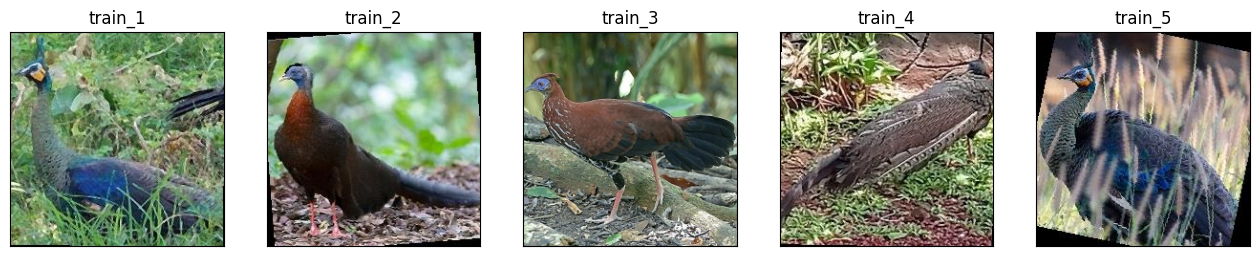

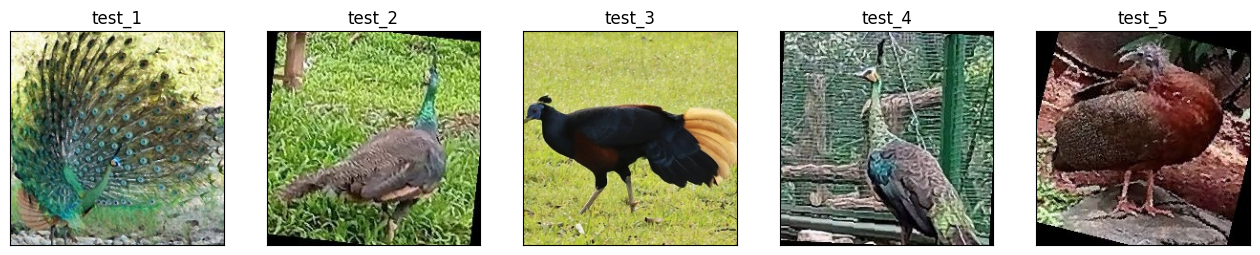

In [4]:
import matplotlib.pyplot as plt

# Melihat Sample gambar
fig = plt.figure(figsize=(16,9))
fig2 = plt.figure(figsize=(16,9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.set_title(f'train_{i+1}')
    ax.imshow((x_training[i].astype(np.uint8)))
    ax2 = fig2.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax2.set_title(f'test_{i+1}')
    ax2.imshow((x_testing[i].astype(np.uint8)))

In [17]:
# Count number of class
# re-scale so that all values in x within 0 to 1
# x_training_rscl = x_training.astype('float32')/255

# Let's confirm the number of classes
no_of_classes_train = len(np.unique(y_training))
print(no_of_classes_train)


y_training_categ = np.array(to_categorical(y_training, no_of_classes_train))

no_of_classes_test = len(np.unique(y_testing))
print(no_of_classes_test)


y_testing_categ = np.array(to_categorical(y_testing, no_of_classes_test))

3
3


In [6]:
print(y_training[0])
print(y_training_categ[0])

1
[0. 1. 0.]


In [7]:
# Split dataset to train and  test
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training_categ, test_size = 0.2, random_state = 43)

In [8]:
total_x = x_training.shape[0] + x_testing.shape[0]
print('x : ', total_x)
print()

print('Jumlah data x_train = ', x_train.shape[0])
print('Jumlah data x_valid = ', x_valid.shape[0])
print('Jumlah data x_test = ', x_testing.shape[0])
print()

total_y = y_training.shape[0] + y_testing.shape[0]
print('y : ', total_y)
print()
print('Jumlah data y_train = ', y_train.shape[0])
print('Jumlah data y_valid = ', y_valid.shape[0])
print('Jumlah data y_test = ', y_testing.shape[0])


x :  2298

Jumlah data x_train =  1471
Jumlah data x_valid =  368
Jumlah data x_test =  459

y :  2298

Jumlah data y_train =  1471
Jumlah data y_valid =  368
Jumlah data y_test =  459


In [44]:
# Load Model
from keras.models import Model
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

# load vgg16 model without final layers(include_top=False)
base_model_vgg16 = applications.VGG16(weights='imagenet', include_top=True)
print("Telah memuat model!")

# Let's freeze the first 15 layers - if you see the VGG layers model below,
# We are freezing till the last conv layer.
for layer in base_model_vgg16.layers[:19]:
    layer.trainable = False

base_model_vgg16.summary()


Telah memuat model!
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 5

In [45]:
# Melihat Layer dari VGG16
for (i, layer) in enumerate(base_model_vgg16.layers):
    print(f"Layer {i+1} : {layer.__class__.__name__}, Trainabel : {layer.trainable} ")

Layer 1 : InputLayer, Trainabel : False 
Layer 2 : Conv2D, Trainabel : False 
Layer 3 : Conv2D, Trainabel : False 
Layer 4 : MaxPooling2D, Trainabel : False 
Layer 5 : Conv2D, Trainabel : False 
Layer 6 : Conv2D, Trainabel : False 
Layer 7 : MaxPooling2D, Trainabel : False 
Layer 8 : Conv2D, Trainabel : False 
Layer 9 : Conv2D, Trainabel : False 
Layer 10 : Conv2D, Trainabel : False 
Layer 11 : MaxPooling2D, Trainabel : False 
Layer 12 : Conv2D, Trainabel : False 
Layer 13 : Conv2D, Trainabel : False 
Layer 14 : Conv2D, Trainabel : False 
Layer 15 : MaxPooling2D, Trainabel : False 
Layer 16 : Conv2D, Trainabel : False 
Layer 17 : Conv2D, Trainabel : False 
Layer 18 : Conv2D, Trainabel : False 
Layer 19 : MaxPooling2D, Trainabel : False 
Layer 20 : Flatten, Trainabel : True 
Layer 21 : Dense, Trainabel : True 
Layer 22 : Dense, Trainabel : True 
Layer 23 : Dense, Trainabel : True 


In [51]:
# Classification Section Architect VGG16 3 Class

# Mengambil output dari layer sebelumnya (sebelum Dense terakhir)
output_layer_22_vgg16 = base_model_vgg16.layers[-2].output

# Menambahkan layer Dense baru dengan 3 output (sesuai dengan jumlah kelas Anda)
predictions_layer_3_kelas = Dense(3, activation='softmax')(output_layer_22_vgg16)

# Membuat model baru dengan perubahan yang dilakukan
VGG16_model_3kelas = Model(inputs=base_model_vgg16.input, outputs=predictions_layer_3_kelas)

In [52]:
VGG16_model_3kelas.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [15]:
# Classification Section Architect Modify
# 1 layer GlobalAveragePooling2D + 1 Dense(3, activation'softmax')

# top_model = Sequential()
# top_model.add(GlobalAveragePooling2D(input_shape=base_model_vgg16.output_shape[1:]))
# top_model.add(Dense(no_of_classes_train, activation='softmax'))
# top_model.summary()

# model = Sequential()
# model.add(base_model_vgg16)
# model.add(top_model)
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 sequential (Sequential)     (None, 3)                 1539      
                                                                 
Total params: 14716227 (56.14 MB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [53]:
# Sesuaikan optimasi yang mau digunakan, loss menggunakan categorycal_crossentropy karena kelas yang dipelajari 3 
VGG16_model_3kelas.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [54]:
# [Train Process] time to train model
from keras.callbacks import ModelCheckpoint

epochs = 20
btchSize = 100
model_save_path = ".\\trained_model\model2.hdf5"

train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train, batch_size = btchSize)

validation_generator = valid_datagen.flow(
    x_valid, y_valid, batch_size = btchSize)

checkpointer = ModelCheckpoint(model_save_path, save_best_only = True, verbose = 1)

history = VGG16_model_3kelas.fit(
    train_generator,
    steps_per_epoch = len(x_train) // btchSize,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = len(x_valid) // btchSize,
    callbacks = [checkpointer])

np.save('.\\trained_model\historymodel2_save.npy', history.history)

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 35.6014 - accuracy: 0.4464  
Epoch 1: val_loss improved from inf to 4.04064, saving model to .\trained_model\model2.hdf5


c:\Python\Python3.11.6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1204s 87s/step - loss: 35.6014 - accuracy: 0.4464 - val_loss: 4.0406 - val_accuracy: 0.6400
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.1937 - accuracy: 0.8680  
Epoch 2: val_loss improved from 4.04064 to 0.38380, saving model to .\trained_model\model2.hdf5
14/14 [==============================] - 1176s 85s/step - loss: 1.1937 - accuracy: 0.8680 - val_loss: 0.3838 - val_accuracy: 0.9567
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9886  
Epoch 3: val_loss improved from 0.38380 to 0.20421, saving model to .\trained_model\model2.hdf5
14/14 [==============================] - 1192s 86s/step - loss: 0.0597 - accuracy: 0.9886 - val_loss: 0.2042 - val_accuracy: 0.9667
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9942  
Epoch 4: val_loss did not improve from 0.20421
14/14 [==============================] - 1124s 81s/step - loss: 0.0379 - acc

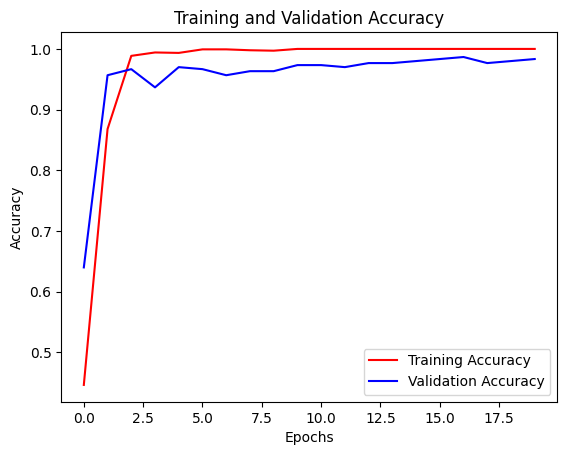

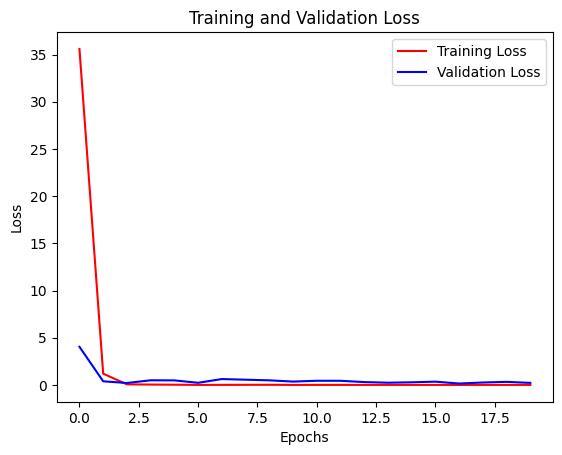

In [56]:
# Line Chart Perkembangan Akurasi & Loss Training Model

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [27]:
# Load model

# muat model agar dapat ditest
mymodel_path = '.\\trained_model\\model3\\model3.hdf5'
mymodelhistory_path = '.\\trained_model\\model3\\historymodel3_save.npy'

mymodel = load_model(mymodel_path)
history = np.load(mymodelhistory_path, allow_pickle = 'TRUE').item()

In [23]:
btchSize_test = 45

(eval_loss, eval_accuracy) = mymodel.evaluate(
    x_testing, y_testing_categ, batch_size = btchSize_test, verbose = 1)

print(f"Accuracy : {eval_accuracy*100}%")
print(f"Loss : {eval_loss}")
print()
print(f"Jumlah data train : {len(x_train)+len(x_valid)}")
print(f"Jumlah data test : {len(x_testing)}")

11/11 [==============================] - 339s 30s/step - loss: 0.1267 - accuracy: 0.9804
Accuracy : 98.03921580314636%
Loss : 0.12667490541934967

Jumlah data train : 1839
Jumlah data test : 459


15/15 [==============================] - 327s 22s/step


Text(0.5, 155.72222222222217, 'Predicted')

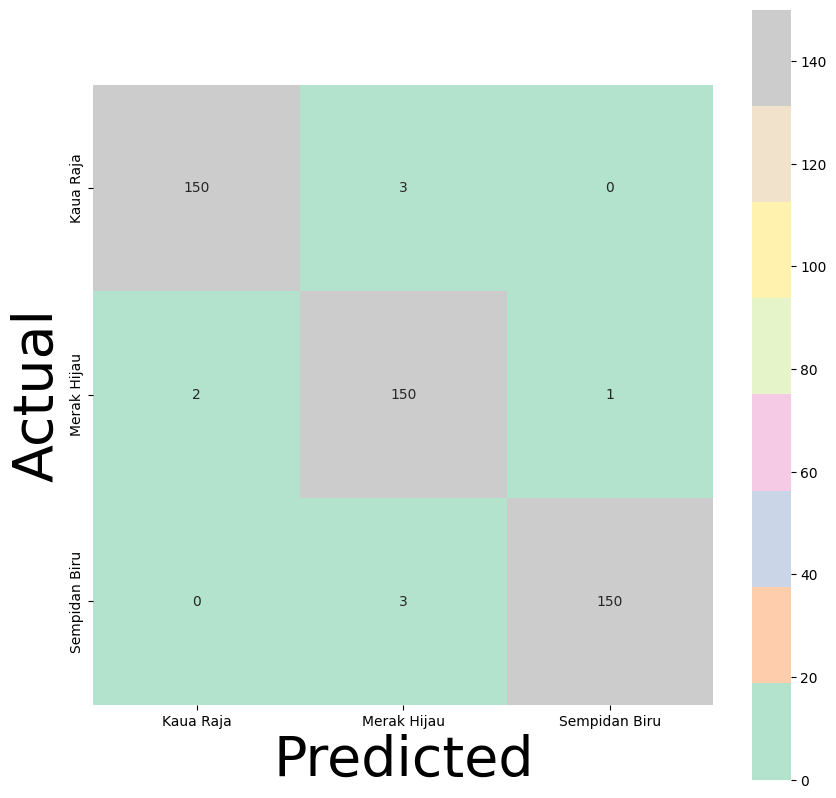

In [25]:
# Evaluasi model dengan confusion matrix
y_predict = mymodel.predict(x_testing)

y_predict = np.argmax(y_predict, axis = 1)
y_true = np.argmax(y_testing_categ, axis = 1)

cm = confusion_matrix(y_true, y_predict)
plt.figure(figsize = (10, 10))
ax = sns.heatmap(
    cm, 
    cmap = plt.cm.Pastel2, 
    annot = True, 
    square = True, 
    xticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    yticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    fmt = 'd' )
ax.set_ylabel('Actual', fontsize = 40)
ax.set_xlabel('Predicted', fontsize = 40)

## Arsitektur ke2

In [9]:
# Arsitektur Coba-coba

model_built_from_scratch = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed = 112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed = 112),
    tf.keras.layers.Dense(3, activation = 'softmax'),
])

model_built_from_scratch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [10]:
# Sesuaikan optimasi yang mau digunakan, loss menggunakan categorycal_crossentropy karena kelas yang dipelajari 3 
model_built_from_scratch.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [11]:
epochs = 20
btchSize = 100
model_save_path = ".\\trained_model\model4.hdf5"

train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train, batch_size = btchSize)

validation_generator = valid_datagen.flow(
    x_valid, y_valid, batch_size = btchSize)

checkpointer = ModelCheckpoint(model_save_path, save_best_only = True, verbose = 1)

history2 = model_built_from_scratch.fit(
    train_generator,
    steps_per_epoch = len(x_train) // btchSize,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = len(x_valid) // btchSize,
    callbacks = [checkpointer])

np.save('.\\trained_model\historymodel4_save.npy', history2.history)

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 6.4951 - accuracy: 0.3406
Epoch 1: val_loss improved from inf to 1.07247, saving model to .\trained_model\model4.hdf5


c:\Python\Python3.11.6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 89s 6s/step - loss: 6.4951 - accuracy: 0.3406 - val_loss: 1.0725 - val_accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.4121
Epoch 2: val_loss improved from 1.07247 to 1.04919, saving model to .\trained_model\model4.hdf5
14/14 [==============================] - 89s 6s/step - loss: 1.0718 - accuracy: 0.4121 - val_loss: 1.0492 - val_accuracy: 0.4667
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.9594 - accuracy: 0.5456
Epoch 3: val_loss improved from 1.04919 to 0.78913, saving model to .\trained_model\model4.hdf5
14/14 [==============================] - 78s 5s/step - loss: 0.9594 - accuracy: 0.5456 - val_loss: 0.7891 - val_accuracy: 0.6567
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.8495 - accuracy: 0.6193
Epoch 4: val_loss did not improve from 0.78913
14/14 [==============================] - 73s 5s/step - loss: 0.8495 - accuracy: 0.6193 - val

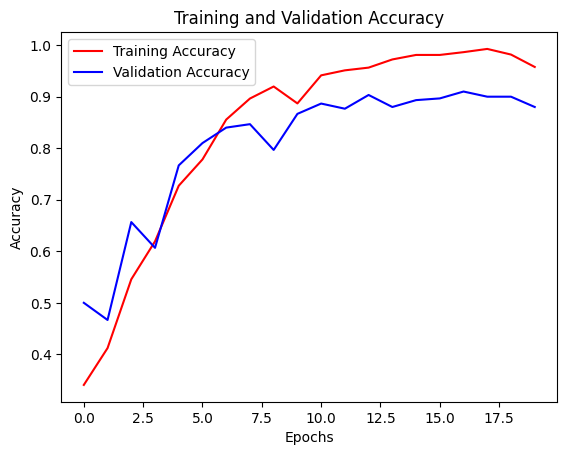

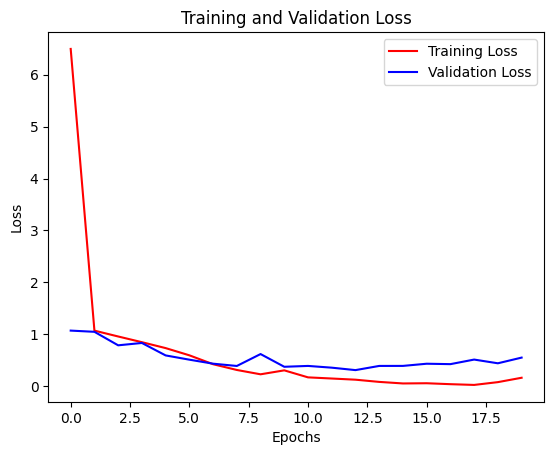

In [12]:
# Line Chart Perkembangan Akurasi & Loss Training Model

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [14]:
# Load model

# muat model agar dapat ditest
mymodel_path = '.\\trained_model\\model4\\model4.hdf5'
mymodelhistory_path = '.\\trained_model\\model4\\historymodel4_save.npy'

mymodel = load_model(mymodel_path)
history = np.load(mymodelhistory_path, allow_pickle = 'TRUE').item()

In [18]:
btchSize_test = 45

(eval_loss, eval_accuracy) = model_built_from_scratch.evaluate(
    x_testing, y_testing_categ, batch_size = btchSize_test, verbose = 1)

print(f"Accuracy : {eval_accuracy*100}%")
print(f"Loss : {eval_loss}")
print()
print(f"Jumlah data train : {len(x_train)+len(x_valid)}")
print(f"Jumlah data test : {len(x_testing)}")

11/11 [==============================] - 7s 650ms/step - loss: 0.2956 - accuracy: 0.8976
Accuracy : 89.76035118103027%
Loss : 0.2955803871154785

Jumlah data train : 1839
Jumlah data test : 459


15/15 [==============================] - 7s 471ms/step


Text(0.5, 155.72222222222217, 'Predicted')

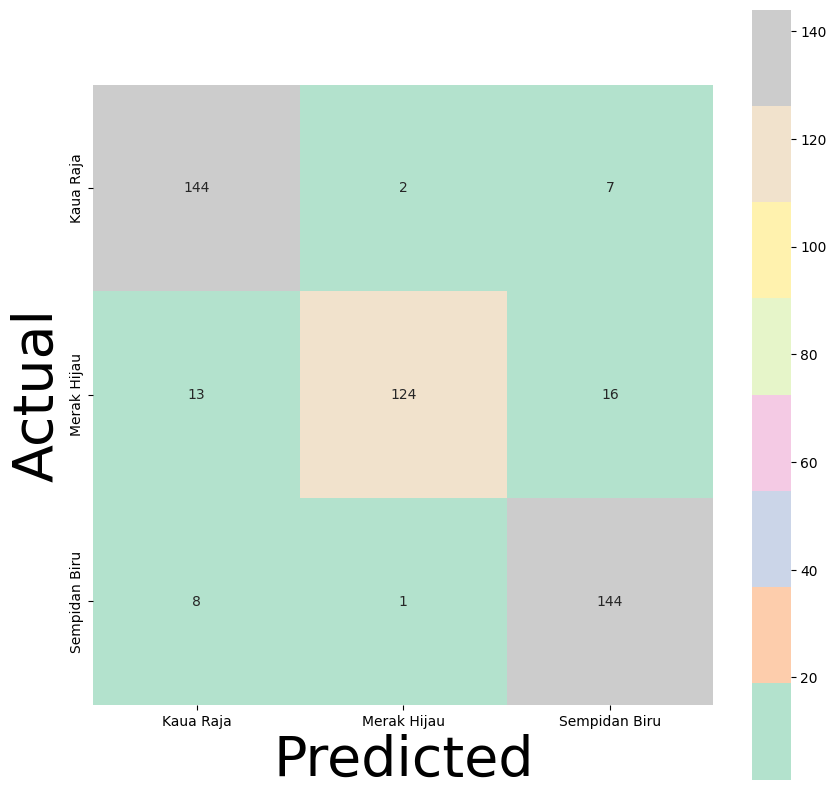

In [20]:
# Evaluasi model dengan confusion matrix
y_predict = model_built_from_scratch.predict(x_testing)

y_predict = np.argmax(y_predict, axis = 1)
y_true = np.argmax(y_testing_categ, axis = 1)

cm = confusion_matrix(y_true, y_predict)
plt.figure(figsize = (10, 10))
ax = sns.heatmap(
    cm, 
    cmap = plt.cm.Pastel2, 
    annot = True, 
    square = True, 
    xticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    yticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    fmt = 'd' )
ax.set_ylabel('Actual', fontsize = 40)
ax.set_xlabel('Predicted', fontsize = 40)